# Логистическая регрессия

Будем решать задачу бинарной классификации, $$Y=\{0, 1\}$$ 


Задачу можно свести к задачи регрессии со значениями $\{0, 1\}$, затем определять все объекты, для которых $y^* \geq 0.5$ к одному классу, $y^* < 0.5$ к другому. Но тогда могут взникнуть неприятные явления:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# X0 - вектор из 35 случайных чисел от 0 до 0.2
X0 = np.random.rand(35) * 0.2
Y0 = np.zeros_like(X0)

X0[:10], Y0[:10]

(array([0.07907632, 0.05870227, 0.0392928 , 0.1378142 , 0.02248261,
        0.16127885, 0.11227322, 0.01583151, 0.10300928, 0.03147072]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [3]:
# X1 - 210 чисел 
X1_1 = np.random.rand(190) * 0.2 + 0.8
X1_2 = np.random.rand(20) * 0.4 + 0.2

X1 = np.hstack((X1_1, X1_2))
Y1 = np.ones_like(X1)

X1[:10], Y1[:10]

(array([0.99836582, 0.99365196, 0.98454289, 0.84802779, 0.9655593 ,
        0.91737568, 0.8100368 , 0.84160022, 0.81914927, 0.86856236]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [4]:
# объединяем X0 и X1, Y0 и Y1
X = np.zeros((len(X0) + len(X1), 2))

# первый столбец - единицы
X[:, 0] = 1.
# второй столбец - X0 и X1 соответственно
X[:len(X0), 1] = X0
X[len(X0):, 1] = X1

Y = np.hstack((Y0, Y1))

X[:10]

array([[1.        , 0.07907632],
       [1.        , 0.05870227],
       [1.        , 0.0392928 ],
       [1.        , 0.1378142 ],
       [1.        , 0.02248261],
       [1.        , 0.16127885],
       [1.        , 0.11227322],
       [1.        , 0.01583151],
       [1.        , 0.10300928],
       [1.        , 0.03147072]])

In [5]:
# находим коэффиценты регрессии
X = np.matrix(X)
Y = np.matrix(Y).T
theta = (X.T * X).I * X.T * Y
theta

matrix([[0.10080555],
        [1.01683545]])

Найдем точку $x$, где $\theta_0 + \theta_1 x = 0.5$

In [6]:
(0.5 - theta[0, 0]) / theta[1, 0]

0.39258510435411564

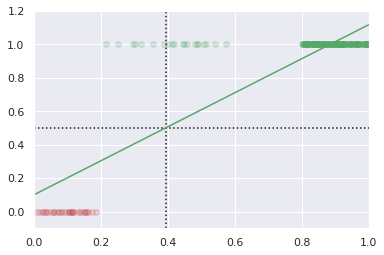

In [7]:
plt.scatter(X0, Y0, alpha=0.2, c='r', s=34)
plt.scatter(X1, Y1, alpha=0.2, c='g', s=34)

plt.plot([0., 1], [0.5, 0.5], 'k:')
plt.plot([(0.5 - theta[0, 0]) / theta[1, 0]] * 2, [-0.1, 1.2], 'k:')

plt.ylim((-0.1, 1.2))
plt.xlim((0, 1.))

dx = np.linspace(0, 1, 100)
dy = theta[0, 0] + dx * theta[1, 0]
plt.plot(dx, dy, 'g')

plt.show()

Вместо этого будем пытаться искать решение не в виде $y^*=\theta^{T}x$, а в виде $y^*=g(\theta^{T}x)$, где 

$$g(z) = \frac{1}{1 + e^{-z}}$$ 

$$ 0<g(z)<1 $$

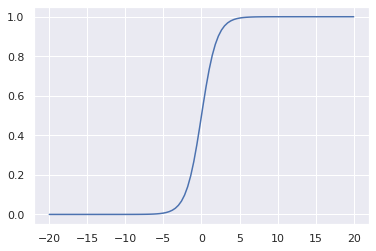

In [8]:
dx = np.linspace(-20, 20, 100)
plt.plot(dx, 1. / (1. + np.exp(-dx)))
plt.show()

$$p(y=1|x;\theta)=g(\theta^{T}x)$$ 


$$p(y=0|x;\theta)=1-g(\theta^{T}x)$$


$$p(y|x;\theta)=g(\theta^{T}x)^{y}(1-g(\theta^{T}x))^{(1-y)}$$

Таким образом мы определили условную функцию вероятности (*pmf*). Можно записать $log$-функцию максимального правдоподобия по всем данным из тренировочного множества:
$$\log L(\theta)=\log \prod_{(x_i, y_i) \in T^l}{g(\theta^{T}x_i)^{y_i}(1-g(\theta^{T}x_i))^{(1-y_i)}} = $$
$$= \sum_{(x_i, y_i) \in T^l}{{y_i} \log (g(\theta^{T}x_i)) + (1-y_i) \log (1-g(\theta^{T}x_i))}$$

Нам нужно найти вектор $\theta$ который максимизирует $\log L(\theta)$ . Можно интерпретировать иначе, пусть у нас есть функционал качества:

$$Q(\theta) = \sum_{(x_i, y_i) \in T^l}{-{y_i} \log (g(\theta^{T}x_i)) - (1-y_i) \log (1-g(\theta^{T}x_i))}$$

и нужно найти его минимум.

Производная сигмоида: 
$$g'(z) = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}}\left(1 - \frac{1}{1 + e^{-z}}\right)=g(z)(1-g(z))$$

Частная производная функции потерь:

$$\frac{\partial \mathbb L(\theta; x, y)}{\partial \theta_k} = \frac{\partial}{\partial \theta_k} (-y \log (g(\theta^{T}x)) - (1-y) \log (1-g(\theta^{T}x))) = $$ 

$$ = \left(-\frac{y}{g(\theta^{T}x)} + \frac{1 - y}{1-g(\theta^{T}x)}\right) (1-g(\theta^{T}x)) g(\theta^{T}x) x_k = $$

$$ = \left( -y + y g(\theta^{T}x) - y g(\theta^{T}x) + g(\theta^{T}x) \right)x_k = $$

$$ = \left( g(\theta^{T}x) - y \right)x_k$$

Таким образом:

$$\frac{\partial Q(\theta)}{\partial \theta_k} = \sum_{(x_i, y_i) \in T^l}{\left( g(x_i^{T}\theta) - y_i \right)x_{ik}}$$

$$grad(Q) = \left( g(X\theta) - Y \right)^T X$$

In [9]:
import scipy as sp

sigmoid = lambda x: 1. / (1. + np.exp(-x))

def gen_functions(X, Y):
    # плохо
    def func_to_min(theta):
        theta = theta.reshape((-1, 1))

        t1 = sigmoid(X @ theta)
        t2 = -Y * np.log(t1)
        t3 = -(1. - Y) * np.log(1. - t1)

        return np.sum(t2 + t3)    

    # то же самое, но хорошо
    def func_to_min_2(theta):
        theta = theta.reshape((-1, 1))      
        
        t1 = Y * ( X @ theta - np.log(1.0 + np.exp(X @ theta)) )        
        t2 = (1. - Y) * ( -np.log(1.0 + np.exp(X @ theta))  )
        
        return -np.sum(t1 + t2)

    def func_grad(theta):
        theta = theta.reshape((-1, 1))      
        return ((sigmoid(X @ theta) - Y).T @ X).ravel()
    
    return func_to_min_2, func_grad

In [10]:
func, grad = gen_functions(np.array(X), np.array(Y))

bd = [(-100., 100.), (-100., 100.)] 

sp.optimize.fmin_tnc(func, np.array([-0.002, -0.003]), grad, bounds=bd)
sp.optimize.fmin_l_bfgs_b(func, np.array([-0.002, -0.003]), bounds=bd, approx_grad=True)

(array([-20.23495834, 100.        ]),
 0.5324003081574752,
 {'grad': array([ 1.46549439e-06, -9.79821779e-03]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 78,
  'nit': 20,
  'warnflag': 0})

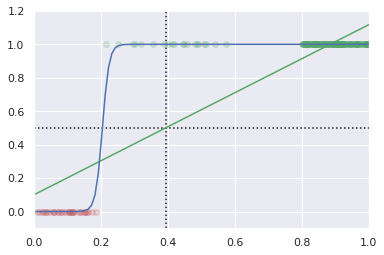

In [11]:
%matplotlib inline

plt.scatter(X0, Y0, alpha=0.2, c='r', s=34)
plt.scatter(X1, Y1, alpha=0.2, c='g', s=34)

plt.plot([0., 1], [0.5, 0.5], 'k:')
plt.plot([(0.5 - theta[0, 0]) / theta[1, 0]] * 2, [-0.1, 1.2], 'k:')

plt.ylim((-0.1, 1.2))
plt.xlim((0, 1.))

dx = np.linspace(0, 1, 100)
dy = theta[0, 0] + dx * theta[1, 0]
plt.plot(dx, dy, 'g')
plt.plot(dx, sigmoid(-20.4 + dx * 100), 'b')

plt.show()

Минимума может и не быть, например, если существует очень разделяющая гиперплоскость, которая всё идеально разделяет (complete separation). Тогда функция очень медленно скатывается вниз. Но там это и не важно, главное найти пропорции между коэффицентами.

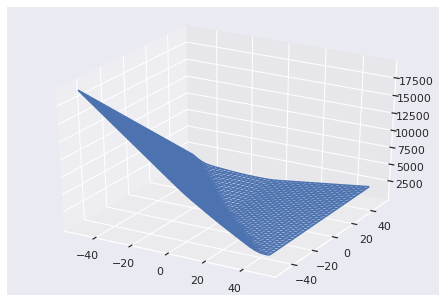

In [12]:
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

dx = np.linspace(-50, 50, 40)
dy = np.linspace(-50, 50, 40)
dX, dY = np.meshgrid(dx, dy)

dZ = np.array([func(np.array([x, y])) for x, y in zip(dX.ravel(), dY.ravel())])
dZ = dZ.reshape((-1, 40))
ax.plot_wireframe(dX, dY, dZ)

plt.show()

### Нелинейные разделяющие поверхности

Признаки объекта можно комбинировать, чтобы получать нелинейную разделяющую поверхность

In [13]:
# генерируем 200 случайных точек на плоскости
l = 200
X = np.random.rand(l, 2)

# первый вариат данных
# всё, что в круге радиуса 0.2 c центром в (0.5, 0.5) -- это 1
Y1 = np.zeros(l)
Y1[ np.sqrt((X[:,0] - 0.5) ** 2 + (X[:,1] - 0.5) ** 2) < 0.2 ] = 1

# второй вариант данных
# всё, что справа от прямой x + 0.2 * y = 0.5 -- это  1
Y2 = np.zeros(l)
Y2[ X[:,0] + 0.2 * X[:, 1] > 0.5 ] = 1.

In [14]:
np.sqrt((X[:,0] - 0.5) ** 2 + (X[:,1] - 0.5) ** 2) < 0.2

array([False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,

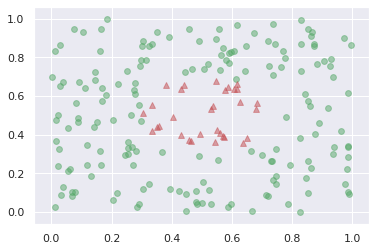

In [15]:
plt.scatter(X[Y1 == 0, 0], X[Y1 == 0, 1], alpha=0.5, c='g', s=34)
plt.scatter(X[Y1 == 1, 0], X[Y1 == 1, 1], alpha=0.5, c='r', s=34, marker='^')

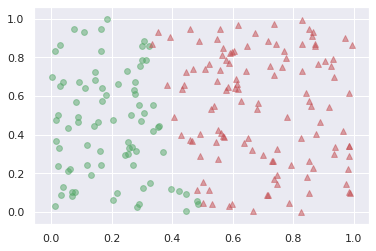

In [16]:
plt.scatter(X[Y2 == 0, 0], X[Y2 == 0, 1], alpha=0.5, c='g', s=34)
plt.scatter(X[Y2 == 1, 0], X[Y2 == 1, 1], alpha=0.5, c='r', s=34, marker='^')

In [17]:
# добавляем единицы в первый столбец
X_and_ones = np.hstack((np.ones(l).reshape(-1, 1), X))

func1, grad1 = gen_functions(X_and_ones, Y1.reshape((-1, 1)))
func2, grad2 = gen_functions(X_and_ones, Y2.reshape((-1, 1)))

bd = [(-100., 10.)] * 3

# находим искомые theta
theta1 = sp.optimize.fmin_l_bfgs_b(func1, np.array([-0.002] * 3), bounds=bd, approx_grad=True)[0]
theta2 = sp.optimize.fmin_l_bfgs_b(func2, np.array([-0.002] * 3), bounds=bd, approx_grad=True)[0]

theta1, theta2

(array([-1.87124634,  0.27364451,  0.07630086]),
 array([-4.89740687, 10.        ,  1.8607671 ]))

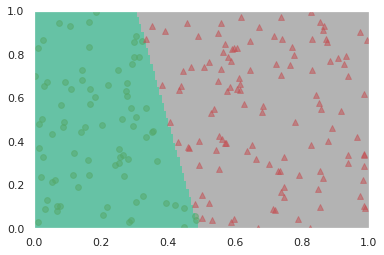

In [18]:
from matplotlib import cm

def classify_func(x, y, theta):
    return int(sigmoid(np.sum(theta * np.array([1., x, y]))) > 0.5)
    
xx, yy = np.meshgrid(np.linspace(0., 1., 150), np.linspace(0., 1, 150))
zz = np.array([classify_func(point[0], point[1], theta2) for point in zip(xx.ravel(), yy.ravel())])

plt.pcolormesh(xx, yy, zz.reshape(xx.shape), cmap=cm.get_cmap('Set2'))

plt.scatter(X[Y2 == 0, 0], X[Y2 == 0, 1], alpha=0.5, c='g', s=34)
plt.scatter(X[Y2 == 1, 0], X[Y2 == 1, 1], alpha=0.5, c='r', s=34, marker='^')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

Разделяющей гиперплоскости для первого случая нет. Тогда можно немного "расширить" пространство:

In [19]:
new_X = np.zeros((l, 6))
new_X[:, 0] = 1.
new_X[:, 1] = X[:, 0]
new_X[:, 2] = X[:, 1]
new_X[:, 3] = X[:, 0] * X[:, 1] 
new_X[:, 4] = X[:, 1] * X[:, 1] 
new_X[:, 5] = X[:, 0] * X[:, 0] 

func3, grad3 = gen_functions(new_X, Y1.reshape((-1, 1)))

bd = [(-100., 100.)] * 6

theta2 = sp.optimize.fmin_l_bfgs_b(func3, np.array([-0.002] * 6), bounds=bd, approx_grad=True)[0]
theta2

array([ -45.64221827,  100.        ,   96.94941157,    6.1821051 ,
       -100.        ,  -99.33646467])

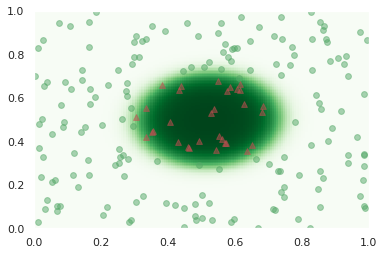

In [20]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

def classify_func(x, y, theta):
    return sigmoid(np.sum(theta * np.array([1., x, y, x * y, y * y, x * x]))) 
     
xx, yy = np.meshgrid(np.linspace(0., 1., 150), np.linspace(0., 1, 150))
zz = np.array([classify_func(point[0], point[1], theta2) for point in zip(xx.ravel(), yy.ravel())])

plt.pcolormesh(xx, yy, zz.reshape(xx.shape), cmap=cm.get_cmap('Greens'))

plt.scatter(X[Y1 == 0, 0], X[Y1 == 0, 1], alpha=0.5, c='g', s=34)
plt.scatter(X[Y1 == 1, 0], X[Y1 == 1, 1], alpha=0.5, c='r', s=34, marker='^')

plt.xlim((0, 1))
plt.ylim((0, 1))

plt.show()